In [1]:
!pip install -q kaggle


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                      title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                          DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           4474        337  1.0              
hummaamqaasim/jobs-in-data                               Jobs and Salaries in Data Science           76KB  2023-12-25 20:03:32           7266        141  1.0              
nelgiriyewithana/new-york-housing-market                 New York Housing Market                    271KB  2024-01-06 16:41:00           2297         71  1.0              
nelgiriyewithana/apple-quality                           Apple Quality                              170KB  2024-01-11 14:31:07           154

In [6]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:42<00:00, 138MB/s]
100% 9.51G/9.51G [01:42<00:00, 99.7MB/s]


In [7]:
!unzip aptos2019-blindness-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [8]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [9]:
print("No of images in train Folder : ",len(train))

No of images in train Folder :  3662


In [10]:
print("No of images in test Folder : ",len(test))

No of images in test Folder :  1928


In [11]:
import matplotlib.pyplot as plt

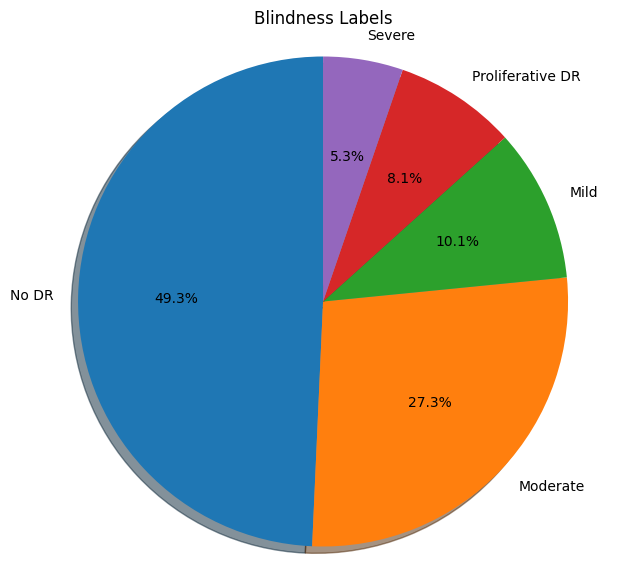

In [12]:
labels='No DR','Moderate','Mild','Proliferative DR','Severe'
sizes=train.diagnosis.value_counts()
fig1,ax1=plt.subplots(figsize=(8,7))
ax1.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
ax1.axis('equal')

plt.title('Blindness Labels')
plt.show()

In [13]:
train

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [14]:
test

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
...,...
1923,ff2fd94448de
1924,ff4c945d9b17
1925,ff64897ac0d8
1926,ffa73465b705


<ipython-input-15-5537106de586>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="diagnosis", data=train, palette="Set2")


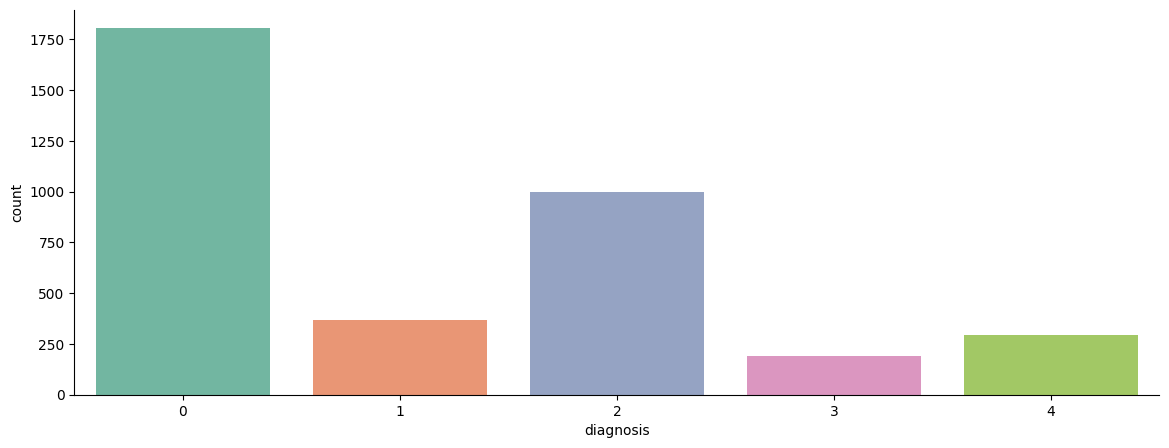

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 5))
ax = sns.countplot(x="diagnosis", data=train, palette="Set2")
sns.despine()
plt.show()

In [16]:
import cv2
import numpy as np

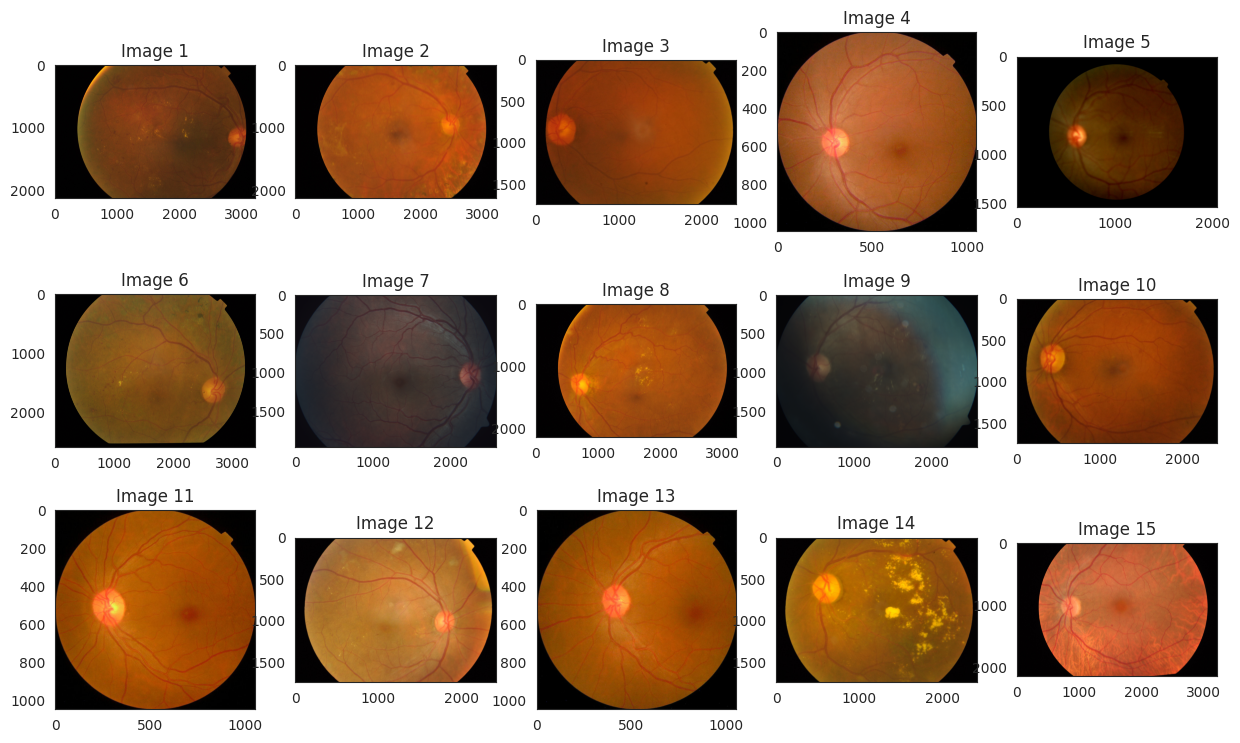

In [17]:
sns.set_style("white")
count = 1
plt.figure(figsize=[15, 15])
for img_name in train['id_code'][:15]:
    img = cv2.imread("train_images/%s.png" % img_name)[...,[2, 1, 0]]
    plt.subplot(5, 5, count)
    plt.imshow(img)
    plt.title("Image %s" % count)
    count += 1

plt.show()

In [18]:
N_CLASSES = train['diagnosis'].nunique()
N_CLASSES

5

In [19]:
train["id_code"] = train["id_code"].apply(lambda x: x + ".png")
test["id_code"] = test["id_code"].apply(lambda x: x + ".png")
train['diagnosis'] = train['diagnosis'].astype('str')
train.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, BatchNormalization,Activation, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2,
                                 horizontal_flip=True)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",
    target_size=(224, 224),
    subset='training')

Found 2930 validated image filenames belonging to 5 classes.


In [24]:
valid_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",
    target_size=(224, 224),
    subset='validation')

Found 732 validated image filenames belonging to 5 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test,
        directory = "test_images/",
        x_col="id_code",
        target_size=(224, 224),
        batch_size=16,
        shuffle=False,
        class_mode=None)

Found 1928 validated image filenames.


In [34]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [35]:
headModel = base_model.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(N_CLASSES, activation="softmax")(headModel)

In [37]:
INIT_LR = 0.001
EPOCHS = 20

In [38]:
model = Model(inputs=base_model.input, outputs=headModel)

# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=INIT_LR), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    verbose=1,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    callbacks=[early_stopping, reduce_lr, tensorboard_callback, model_checkpoint]
)


Epoch 1/20
184/184 [==============================] - ETA: 0s - loss: 0.8689 - accuracy: 0.6887

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/184 [==============================] - 621s 3s/step - loss: 0.8689 - accuracy: 0.6887 - val_loss: 0.7161 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/20
184/184 [==============================] - 611s 3s/step - loss: 0.7219 - accuracy: 0.7403 - val_loss: 0.6682 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 3/20
184/184 [==============================] - 612s 3s/step - loss: 0.6766 - accuracy: 0.7502 - val_loss: 0.6706 - val_accuracy: 0.7459 - lr: 0.0010
Epoch 4/20
184/184 [==============================] - 614s 3s/step - loss: 0.6500 - accuracy: 0.7580 - val_loss: 0.6468 - val_accuracy: 0.7527 - lr: 0.0010
Epoch 5/20
184/184 [==============================] - 606s 3s/step - loss: 0.6270 - accuracy: 0.7724 - val_loss: 0.6623 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 6/20
184/184 [==============================] - ETA: 0s - loss: 0.5992 - accuracy: 0.7768

KeyboardInterrupt: 

1/1 [==============================] - 1s 907ms/step


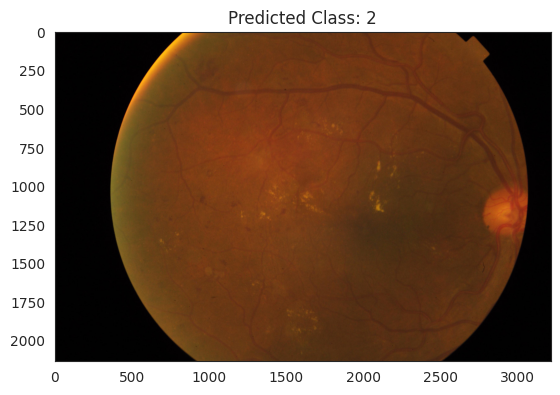

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')  # Use the correct path to your .h5 file

# Load and preprocess the new image
image_path = '/content/000c1434d8d7.png'
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))  # Resize the image to match the input size used during training
img = img / 255.0  # Normalize pixel values to be between 0 and 1
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
predictions = loaded_model.predict(img)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


In [46]:
d={0:"No DR", 1:"Mild",2:"Moderate",4:"Proliferative_DR",3:"Severe"}
print(d[predicted_class])

Moderate
